In [50]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def subsample(channel, bit_depth):
  '''
  Quantize a channel's colors to a certain bit depth.
  For instance, 8 bits allows for 256 colors, etc.
  Note: This function takes A SINGLE CHANNEL, not the whole image as input.
  '''
  div = pow(2, bit_depth)
  subsampled = channel // div * div + div // 2
  return subsampled

Original RGB size:	6291456 bits


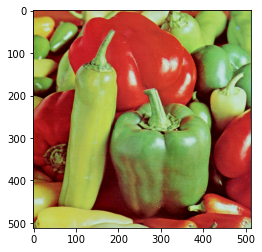

In [52]:
# original image
img = cv.imread('images/peppers.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

original_size = (img.shape[0] * img.shape[1]) * 3 * 8
print(f'Original RGB size:\t{original_size} bits')

plt.imshow(img)

RGB subsampled size:	5505024 bits


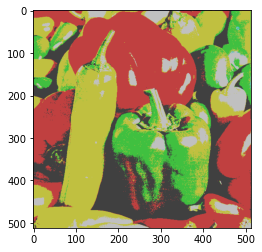

In [53]:
# subsample each channel of RGB image to bit depth = 7 (original is 8)
rgb_bit_depth = 7
img_rgb = img.copy()
img_rgb[:, :, 0] = subsample(img_rgb[:, :, 0], rgb_bit_depth)
img_rgb[:, :, 1] = subsample(img_rgb[:, :, 1], rgb_bit_depth)
img_rgb[:, :, 2] = subsample(img_rgb[:, :, 2], rgb_bit_depth)

rgb_size = (img.shape[0] * img.shape[1]) * 3 * rgb_bit_depth
print(f'RGB subsampled size:\t{rgb_size} bits')

plt.imshow(img_rgb)

YCbCr subsampled size:	5767168 bits


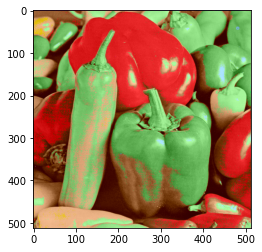

In [54]:
img_ycbcr = cv.cvtColor(img, cv.COLOR_RGB2YCrCb)
cbcr_bit_depth = 6
img_ycbcr[:, :, 1] = subsample(img_ycbcr[:, :, 1], cbcr_bit_depth)
img_ycbcr[:, :, 2] = subsample(img_ycbcr[:, :, 2], cbcr_bit_depth)
img_ycbcr = cv.cvtColor(img_ycbcr, cv.COLOR_YCrCb2RGB)

ycbcr_size = (img.shape[0] * img.shape[1]) * 2 * rgb_bit_depth + (img.shape[0] * img.shape[1]) * 8
print(f'YCbCr subsampled size:\t{ycbcr_size} bits')

plt.imshow(img_ycbcr)

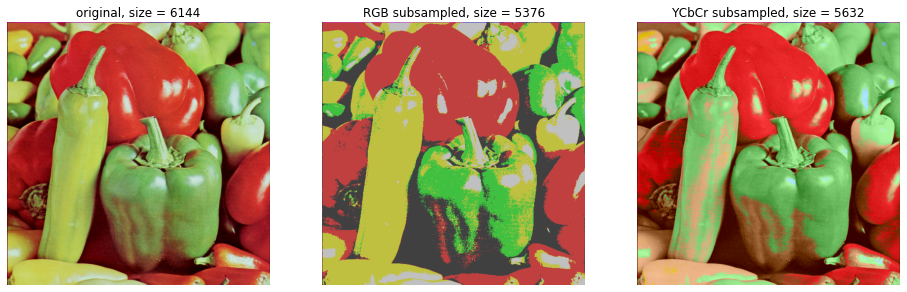

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8))
axs = axs.flatten()
images = [img, img_rgb, img_ycbcr]
titles = [f'original, size = {original_size // 1024}', f'RGB subsampled, size = {rgb_size // 1024}', f'YCbCr subsampled, size = {ycbcr_size // 1024}']
for i in range(len(images)):
  axs[i].imshow(images[i])
  axs[i].set_title(titles[i])
  axs[i].axis('off')
plt.show()